## usable


In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from matplotlib.font_manager import FontProperties
import shap

shap.initjs()


In [2]:
#配色
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)
font = FontProperties(family='Arial', size=12)

In [3]:
# 指定文件路径
file_path = "../SOH1/EIS_state_V/EIS_V.txt"
# file_path = "../SOH1/EISSTATEI/EIS_I_HEBING.txt"

# file_path = "../SOH1/EISstateIX/EIS_IX_HEBING.txt"
# 读取文本文件，使用多个制表符作为分隔符
data = pd.read_csv(file_path, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据
data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562


In [4]:
data

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.37706,0.38562,0.39357,0.40224,0.41037,0.41679,0.42318,0.43253,0.43888,0.44742,...,0.10173,0.11657,0.13491,0.15962,0.19166,0.22601,0.25500,0.28455,0.31862,-0.01155
2297,0.37779,0.38679,0.39343,0.40311,0.40990,0.41774,0.42518,0.43287,0.44012,0.44734,...,0.10225,0.12244,0.14462,0.16723,0.18730,0.21474,0.24555,0.27476,0.30644,-0.01062
2298,0.37796,0.38568,0.39259,0.40104,0.41050,0.41697,0.42654,0.43222,0.43864,0.44691,...,0.10310,0.12321,0.14435,0.16571,0.18709,0.21492,0.24563,0.27498,0.30743,-0.01054
2299,0.37740,0.38399,0.39485,0.40211,0.40978,0.41650,0.42370,0.43107,0.43843,0.44724,...,0.10333,0.12365,0.14414,0.16640,0.18701,0.21457,0.24491,0.27413,0.30817,-0.01049


In [5]:
np.shape(data)

(2301, 120)

In [6]:
# 指定 y 文件的路径
# y_file_path = "../SOH1/合集数据/SOH_all_40_temp.txt"
# y_file_path = "../SOH1/SOH_all_1.txt"
y_file_path = "../SOH1/合集数据/NEWSOH_all_40.txt"
# 读取 y 文件
with open(y_file_path, "r") as file:
    # 逐行读取 y 值，将其转换为浮点数并存储在一个列表中
    y_values = [float(line.strip()) for line in file]

# 将 y 值存储在 Pandas Series 中
y_series = pd.Series(y_values, name="SOH")

# 显示前几个 y 值
np.shape(y_series)

(2301,)

In [7]:
# C0 = data
# #25
# C1 = data.loc[0:189].copy()
# C2 = data.loc[190:369].copy()
# C3 = data.loc[370:570].copy()
# C4 = data.loc[571:604].copy() ##坏的,不可单独使用
# C5 = data.loc[605:797].copy()  ##24678d坏
# C6 = data.loc[798:953].copy()
# C7 = data.loc[954:1046].copy()
# C8 = data.loc[1047:1082].copy() ##坏的
# #35
# C9 = data.loc[1083:1376].copy()
# C10 = data.loc[1377:1693].copy()
# #45
# C11 = data.loc[1624:1991].copy()
# C12 = data.loc[1992:2300].copy()

# C13 = data.loc[0:2300].copy() #C1-C5
# C14 = data.loc[910:1121].copy()  #C6C7

In [8]:
# Y0 = y_series
# Y1 = y_series.loc[0:189].copy()
# Y2 = y_series.loc[190:369].copy() #坏的
# Y3 = y_series.loc[370:570].copy()

# Y4 = y_series.loc[571:604].copy() ##坏的,不可单独使用
# Y5 = y_series.loc[605:797].copy()

# Y6 = y_series.loc[798:953].copy()##坏的,不可单独使用
# Y7 = y_series.loc[954:1046].copy()##坏的,不可单独使用

# Y8 = y_series.loc[1047:1082].copy() ##坏的
# #35
# Y9 = y_series.loc[1083:1376].copy()
# Y10 = y_series.loc[1377:1693].copy()
# #45
# Y11 = y_series.loc[1624:1991].copy()
# Y12 = y_series.loc[1992:2300].copy()

# ##
# Y13 = y_series.loc[0:2300].copy()
# Y14 = y_series.loc[910:1121].copy()


In [9]:
L1=list(range(0, 190))
L2=list(range(190, 370))
L3=list(range(370, 571))
L4=list(range(571, 605))
L5=list(range(605, 798))
L6=list(range(798, 953))
L7=list(range(954, 1046))
L8=list(range(1047, 1082))

L9=list(range(1083, 1377))
L10=list(range(1377, 1694))
L11=list(range(1764, 1991))
L12=list(range(1992, 2301))

In [10]:
C0 = data
#25
C1 = data.loc[L1].copy()
C2 = data.loc[L2].copy()
C3 = data.loc[L3].copy()
C4 = data.loc[L4].copy() ##坏的,不可单独使用
C5 = data.loc[L5].copy()  ##24678d坏的
C6 = data.loc[L6].copy()
C7 = data.loc[L7].copy()
C8 = data.loc[L8].copy() ##坏的
#35
C9 = data.loc[L9].copy()
C10 = data.loc[L10].copy()
#45
C11 = data.loc[L11].copy()
C12 = data.loc[L12].copy()

In [11]:
Y0 = y_series
#25
Y1 = y_series.loc[L1].copy()
Y2 = y_series.loc[L2].copy()
Y3 = y_series.loc[L3].copy()

Y4 = y_series.loc[L4].copy() ##坏的,不可单独使用
Y5 = y_series.loc[L5].copy()  ##24678d坏的

Y6 = y_series.loc[L6].copy()
Y7 = y_series.loc[L7].copy()

Y8 = y_series.loc[L8].copy() ##坏的
#35
Y9 = y_series.loc[L9].copy()
Y10 = y_series.loc[L10].copy()
#45
Y11 = y_series.loc[L11].copy()
Y12 = y_series.loc[L12].copy()

In [12]:
# #1,3,5,9,10,11,12
# waqu = list(range(0, 954)) + list(range(1047, 2300))
waqu = L1+L3+L5+L9+L11+L12
#9,11,12
# Use iloc to select the rows
X_train = data.loc[waqu].copy()
y_train = y_series.loc[waqu].copy()

X_test = C10
y_test = Y10

In [13]:
select_battery = '10'
MLmodel = 'XGBoost'

In [14]:
# # #1,3,5,9,10,11,12
# # waqu = list(range(0, 954)) + list(range(1047, 2300))
# waqu = L3 +L5+L1+ L12 + L9 + L10+ L11
# #9,11,12
# # Use iloc to select the rows
# X_train = data.loc[waqu].copy()
# y_train = y_series.loc[waqu].copy()

# X_test = C1
# y_test = Y1

In [15]:
print("训练集",np.shape(X_train),np.shape(y_train),"测试集",np.shape(X_test),np.shape(y_test))

训练集 (1414, 120) (1414,) 测试集 (317, 120) (317,)


In [16]:
select_battery

'10'

In [17]:
X_train

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.37706,0.38562,0.39357,0.40224,0.41037,0.41679,0.42318,0.43253,0.43888,0.44742,...,0.10173,0.11657,0.13491,0.15962,0.19166,0.22601,0.25500,0.28455,0.31862,-0.01155
2297,0.37779,0.38679,0.39343,0.40311,0.40990,0.41774,0.42518,0.43287,0.44012,0.44734,...,0.10225,0.12244,0.14462,0.16723,0.18730,0.21474,0.24555,0.27476,0.30644,-0.01062
2298,0.37796,0.38568,0.39259,0.40104,0.41050,0.41697,0.42654,0.43222,0.43864,0.44691,...,0.10310,0.12321,0.14435,0.16571,0.18709,0.21492,0.24563,0.27498,0.30743,-0.01054
2299,0.37740,0.38399,0.39485,0.40211,0.40978,0.41650,0.42370,0.43107,0.43843,0.44724,...,0.10333,0.12365,0.14414,0.16640,0.18701,0.21457,0.24491,0.27413,0.30817,-0.01049


数据读取完毕，开始可视化。

## 第一次计算精度，全部特征

In [18]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# train model
model = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

参数寻优

In [20]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split

# # 加载数据
# data = load_boston()
# X, y = data.data, data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 定义模型
# xgb = XGBRegressor()

# # 定义参数网格
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 500, 1000]
# }

# # 创建网格搜索对象
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # 执行网格搜索
# grid_search.fit(X_train, y_train)

# # 输出最佳参数
# print("Best parameters found: ", grid_search.best_params_)


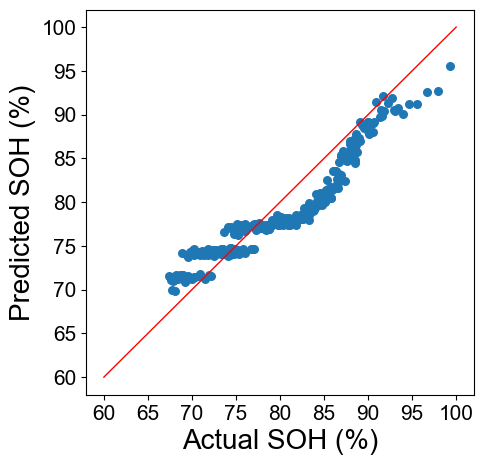

In [35]:
# get predictions
y_pred = model.predict(X_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# mse = mean_squared_error(y, y_pred)
mse_all = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse_all)

rmse_all = np.sqrt(mse_all)
print("均方根误差 (RMSE):", rmse_all)

# r2 = r2_score(y, y_pred)
r2_all = r2_score(y_test, y_pred)
print("决定系数 (R^2):", r2_all)

均方误差 (MSE): 7.742343704577121
均方根误差 (RMSE): 2.782506730374092
决定系数 (R^2): 0.8551787504819157


1) Standard SHAP values

In [23]:
%%time
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# shap_values = explainer(X[0:100])

Wall time: 173 ms


In [24]:
# shap_values_values = np.array(shap_values.values)

# # 保存到文件
# np.savetxt('shap_values_values.txt', shap_values_values)

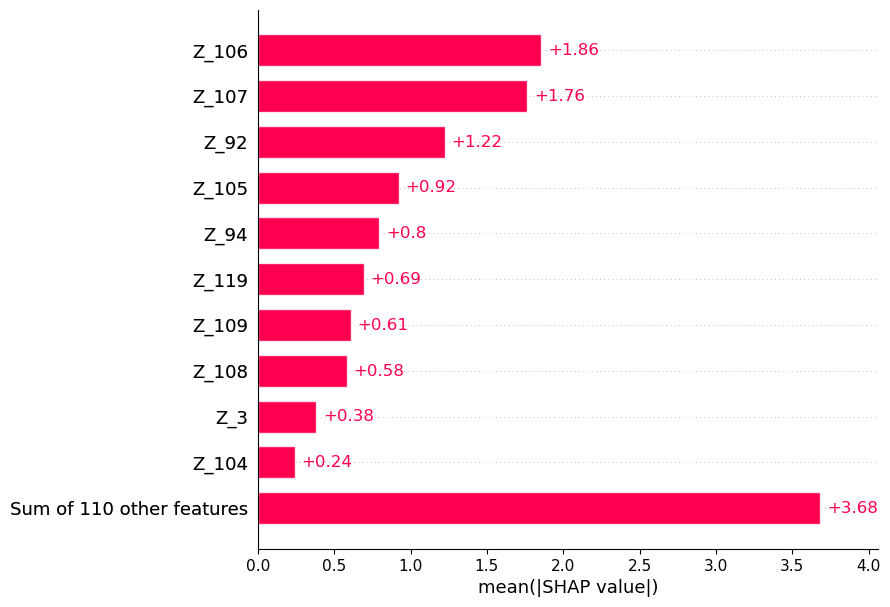

In [25]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

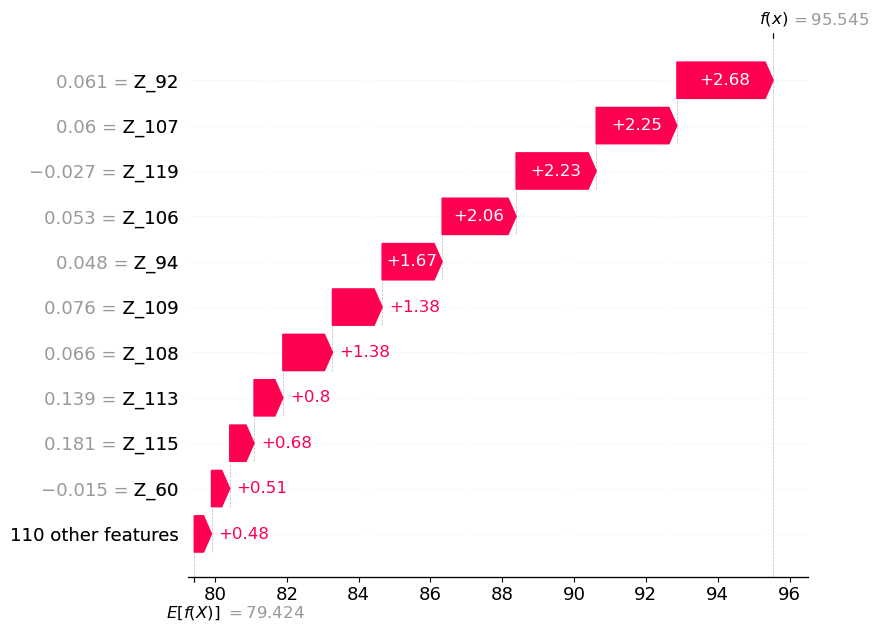

In [26]:
# waterfall plot for first observation
# shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[0], max_display=11,show=False)

# plt.savefig('单次预测1.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( '单次预测1.jpg', format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [27]:
shap.plots.force(shap_values[1])

In [28]:
# force plot
shap.plots.force(shap_values[1],show=False)
# plt.savefig('kaitiwforceplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"kaitiforceplot.jpg", format='jpg', dpi=1000, bbox_inches='tight')

plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

In [117]:
# 计算绝对值并按列求和
abs_shap_values = np.abs(shap_values.values) #取绝对值
mean = abs_shap_values.sum(axis=0) #求和

# 获取前k个最大值
k = 15
meantop = mean.argsort()[-k:][::-1]
meanbottom = mean.argsort()[:k]
#shap值
num_samples = shap_values.values.shape[0]
normalized_mean = mean / num_samples

# mean 中的前k个最大值
top_k_values = normalized_mean[meantop]
top_k_values

array([1.8555548 , 1.7649752 , 1.2238662 , 0.92424095, 0.796417  ,
       0.69478565, 0.61068237, 0.58065593, 0.38193604, 0.2407916 ,
       0.17227888, 0.14284495, 0.14235908, 0.13410443, 0.12552167],
      dtype=float32)

In [123]:
mean

array([3.79929848e+01, 6.48049545e+00, 2.04690266e+01, 1.21073730e+02,
       1.19210224e+01, 5.46124039e+01, 7.22890019e-01, 2.51752224e+01,
       3.69574952e+00, 1.06668878e+00, 1.51327944e+01, 6.67006552e-01,
       7.72134542e-01, 1.54559555e+01, 1.08033857e+01, 4.62977648e-01,
       7.13448668e+00, 9.42328990e-01, 1.64890015e+00, 8.20870686e+00,
       1.36342597e+00, 5.25372148e-01, 1.07960253e+01, 8.49340141e-01,
       6.32495070e+00, 1.91754894e+01, 2.05293961e+01, 1.62378941e+01,
       1.82841339e+01, 9.47774410e+00, 2.05646095e+01, 3.49152708e+00,
       6.40236080e-01, 1.01279049e+01, 3.91138916e+01, 3.02013874e-01,
       3.43565345e+00, 7.69302621e-02, 1.17259550e+00, 1.64876938e+01,
       5.67641401e+00, 1.19454283e-02, 4.54565585e-02, 2.62723655e-01,
       1.36865243e-01, 4.67095792e-01, 1.52261150e+00, 0.00000000e+00,
       3.18403691e-02, 1.25424802e-01, 7.06199408e-01, 2.12749735e-01,
       1.96427554e-01, 5.54254115e-01, 1.52676630e+00, 1.49762228e-01,
      

In [118]:
np.shape(shap_values.values)

(317, 120)

In [119]:
print(meantop)
print(meanbottom)

[106 107  92 105  94 119 109 108   3 104   5  65 112  79  77]
[47 41 98 48 42 37 49 44 55 52 51 43 35 89 15]


In [120]:
X_top10_test = X_test.iloc[:, meantop]
# print(X_top10_test)
X_top10 = X_train.iloc[:, meantop]
# print(X_top10)
# train model
model_select = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model_select.fit(X_top10, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## 模型预测

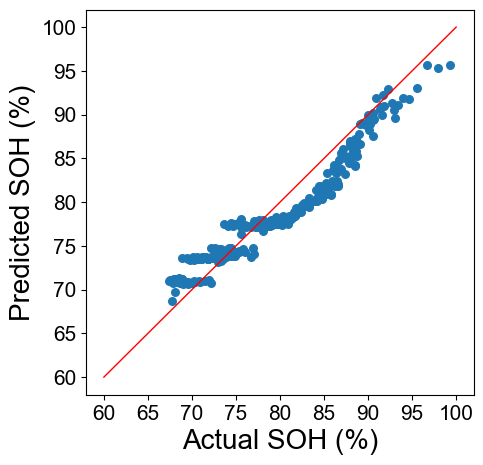

In [121]:
# get predictions
# y_pred = model.predict(X)
y_pred_select = model_select.predict(X_top10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select,s=30)
plt.plot([60 ,100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.savefig( f"前{k}个阻抗_被测电池_{select_battery}_模型{MLmodel}_top10.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"前{k}个阻抗_被测电池_{select_battery}_模型{MLmodel}_top10.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

计算结果

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# mse = mean_squared_error(y, y_pred)
mse_preferred = mean_squared_error(y_test, y_pred_select)
rmse_preferred = np.sqrt(mse_preferred)
r2_preferred = r2_score(y_test, y_pred_select)
print("选择前k个阻抗:", k)
print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)

选择前k个阻抗: 15
均方误差 (MSE): 7.742343704577121
均方根误差 (RMSE): 2.782506730374092
决定系数 (R^2): 0.8551787504819157
top10Z 均方误差 (MSE): 5.837173713036038
top10Z 均方根误差 (RMSE): 2.4160243610187457
top10Z 决定系数 (R^2): 0.890815130013378


bottom_10个Z的训练

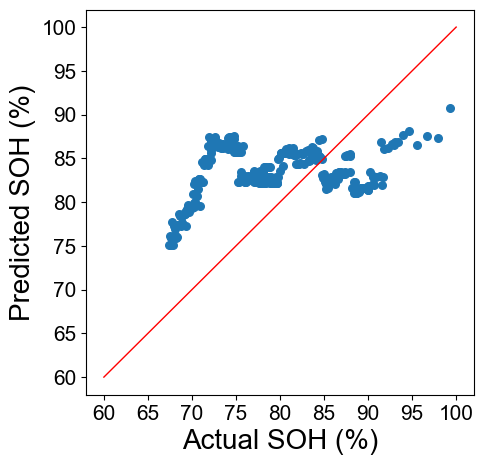

In [109]:
X_bot10_test = X_test.iloc[:, meanbottom]
# print(X_top10_test)
X_bot10_train = X_train.iloc[:, meanbottom]
# print(X_top10)
# train model
model_select_bot = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model_select_bot.fit(X_bot10_train, y_train)

# get predictions
# y_pred = model.predict(X)
y_pred_select_bot = model_select_bot.predict(X_bot10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select_bot,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [110]:
# mse = mean_squared_error(y, y_pred)
mse_preferred_bot = mean_squared_error(y_test, y_pred_select_bot)
rmse_preferred_bot = np.sqrt(mse_preferred_bot)
r2_preferred_bot = r2_score(y_test, y_pred_select_bot)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)


均方误差 (MSE): 7.742343704577121
均方根误差 (RMSE): 2.782506730374092
决定系数 (R^2): 0.8551787504819157
     
top10Z 均方误差 (MSE): 3.9435086896167
top10Z 均方根误差 (RMSE): 1.9858269535930617
top10Z 决定系数 (R^2): 0.9262363080602986
     
bot10Z 均方误差 (MSE): 65.64982247076874
bot10Z 均方根误差 (RMSE): 8.10245780431893
bot10Z 决定系数 (R^2): -0.2279859540769935


In [111]:
type(y_testv)

numpy.ndarray

In [112]:
# 准备箱型图数据
y_testv=y_test.values
values_to_save = [ select_battery,MLmodel,y_testv,y_pred,y_pred_select,y_pred_select_bot]
value_names = ["电池","模型","y测试值","y_all_pred","y_top_pred","y_bot_pred"]

file_name = f"pre_boxfig_被测电池_{select_battery}_模型{MLmodel}.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")


## 任选特征训练；最优特征

In [1795]:
some1=meantop

In [1796]:
some2=meanbottom

In [1797]:
some3 = [107,92,94,119,108,93,106,95,109,105]

In [1798]:
some3 = [32,44,43,111,2,72,0,55,35,53]

In [1799]:
some = some3

In [1800]:
some

[32, 44, 43, 111, 2, 72, 0, 55, 35, 53]

In [1801]:
X_some_train=X_train.iloc[:, some]
X_some_test=X_test.iloc[:, some]

In [1802]:
np.shape(X_some_test)

(309, 10)

In [1803]:
# train model
model_some = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model_some.fit(X_some_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

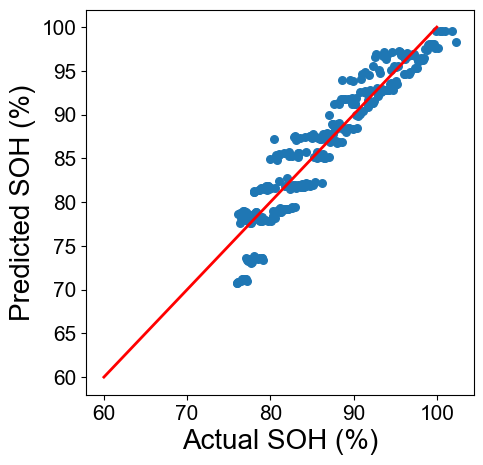

In [1804]:
font = FontProperties(family='Arial', size=12)


# get predictions
# y_pred = model.predict(X)
y_pred_some = model_some.predict(X_some_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_some,s=30)


plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=2)
plt.show()
plt.close()

In [1805]:
# mse = mean_squared_error(y, y_pred)
mse_some = mean_squared_error(y_test, y_pred_some)
rmse_some = np.sqrt(mse_some)
r2_some = r2_score(y_test, y_pred_some)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print("     ")
print("some 均方误差 (MSE):", mse_some)
print("some 均方根误差 (RMSE):", rmse_some)
print("some 决定系数 (R^2):", r2_some)
print("     ")
print(meantop)
print(meanbottom)

均方误差 (MSE): 11.247798067841918
均方根误差 (RMSE): 3.353773705520681
决定系数 (R^2): 0.7765021788062335
     
top10Z 均方误差 (MSE): 9.041478852153256
top10Z 均方根误差 (RMSE): 3.006905195072378
top10Z 决定系数 (R^2): 0.8203425406788544
     
bot10Z 均方误差 (MSE): 98.40339723025272
bot10Z 均方根误差 (RMSE): 9.919848649563798
bot10Z 决定系数 (R^2): -0.9553111414673467
     
some 均方误差 (MSE): 6.10563873183589
some 均方根误差 (RMSE): 2.470959071258747
some 决定系数 (R^2): 0.8786787471351347
     
[107  95  94 108  92 109 114  58  60 104]
[44 45  8 38 43 10 52 42 40 12]


In [1806]:
k

10

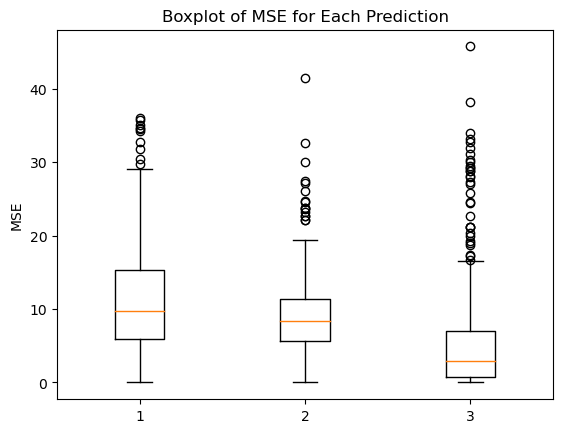

In [1810]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 假设 y_test 和 y_pred 已经定义
# # 例如: y_test = np.array([...]), y_pred = np.array([...])

# # 计算每个预测值和实际值之间的平方差
# mse_series = np.square(np.subtract(y_test, y_pred))
# mse_series_select = np.square(np.subtract(y_test, y_pred_select))
# mse_series_select_bot = np.square(np.subtract(y_test, y_pred_select_bot))
# mse_series_some = np.square(np.subtract(y_test, y_pred_some))

# series=[mse_series,mse_series_select,mse_series_some]
# # 绘制箱型图
# plt.boxplot(series)
# plt.ylabel('MSE')
# plt.title('Boxplot of MSE for Each Prediction')
# plt.show()


## 新图 SOH预测对比，真值、all f、top10 f、bot10 f、somef

In [1749]:
y_test

1992    102.327593
1993    101.800289
1994    101.033303
1995    100.657820
1996    100.345245
           ...    
2296     76.166891
2297     76.096917
2298     76.128720
2299     76.043577
2300     76.038603
Name: SOH, Length: 309, dtype: float64

y_test
y_pred
y_pred_select
y_pred_select_bot
y_pred_some
Measured
All Features
Top10 Features
Bottom10 Features
Final10 Features

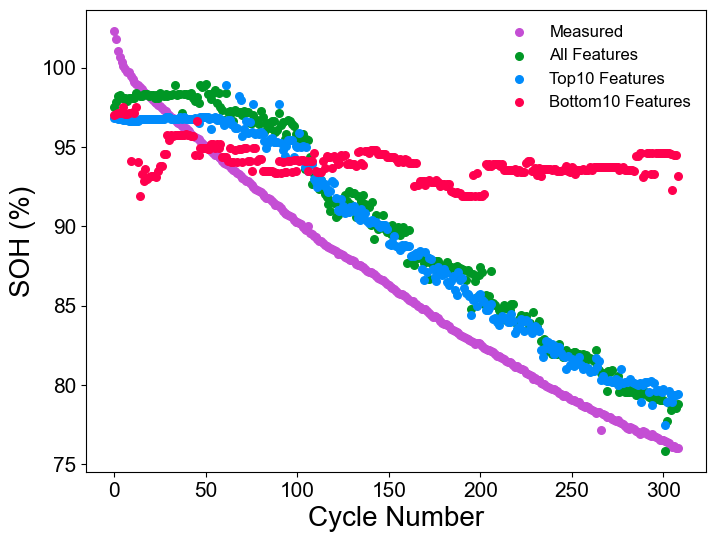

In [1750]:

font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

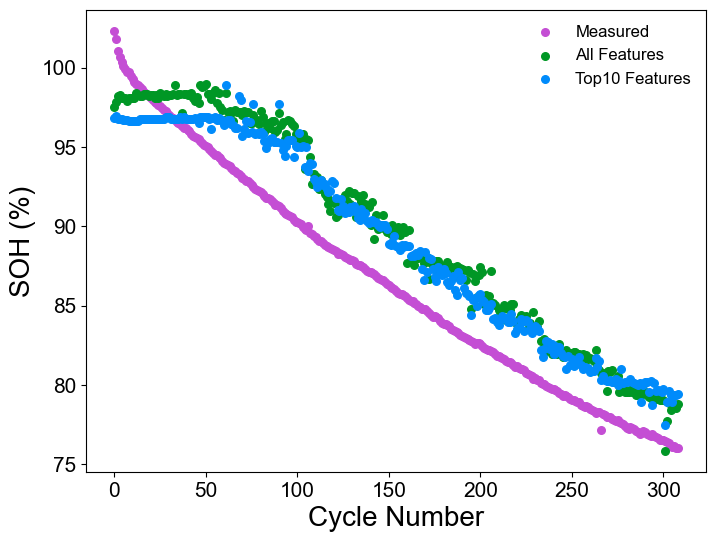

In [1751]:
font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x,  y_pred_some, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

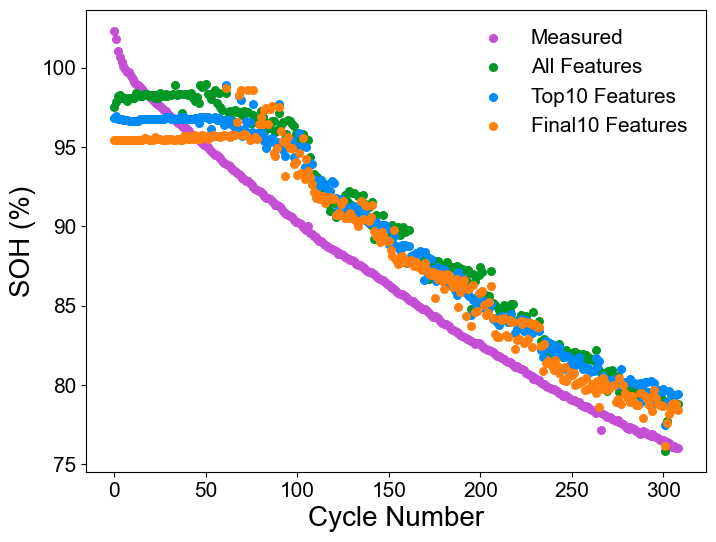

In [1752]:
font = FontProperties(family='Arial', size=15)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

plt.scatter(x, y_pred_some, color=orangese, label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

## 随机选择k个点，作为输入特征的性能。

In [1753]:
import random
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# 初始化一个空列表来存储所有的 r2_score
r2_scores = []
same_variables = []
mse_sames = []

# 设置循环次数 w
w = 200
# 设置特征数量
random_number = k

# 特征总数
total_features = X_train.shape[1]

for _ in range(w):
    # 随机选择五个特征的索引
    random_features = random.sample(range(total_features), random_number)

    # 转化成字符串并用逗号分隔
    five = ",".join(map(str, random_features))

    # 复制到 some 变量
    same = five

    # 存储 some 变量
    same_variables.append(same)
    
    # 从 X_train 和 X_test 中提取对应的特征
    X_same_train = X_train.iloc[:, random_features]
    X_same_test = X_test.iloc[:, random_features]

    # 初始化 XGBoost 模型
    model_same = xgb.XGBRegressor(objective="reg:squarederror")

    # 训练模型
    model_same.fit(X_same_train, y_train)

    # 预测
    y_pred_same = model_same.predict(X_same_test)

    # 计算 R-squared 分数
    r2_same_random = r2_score(y_test, y_pred_same)

    # 存储 R-squared 分数
    r2_scores.append(r2_same_random)
    
    # mse = mean_squared_error(y, y_pred)
    mse_same = mean_squared_error(y_test, y_pred_same)
    mse_sames.append(mse_same)
    
# 输出所有 R-squared 分数
np.shape(r2_scores)


(200,)

In [1754]:
# 计算R-squared的平均值
average_r2 = sum(r2_scores) / len(r2_scores)

std_deviation = np.std(r2_scores)
print("Random_numbers:",random_number,".","Average R-squared:", average_r2,f"R-squared标准差: {std_deviation}")

Random_numbers: 10 . Average R-squared: 0.5423359412688435 R-squared标准差: 0.3031412533406668


In [1755]:
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)

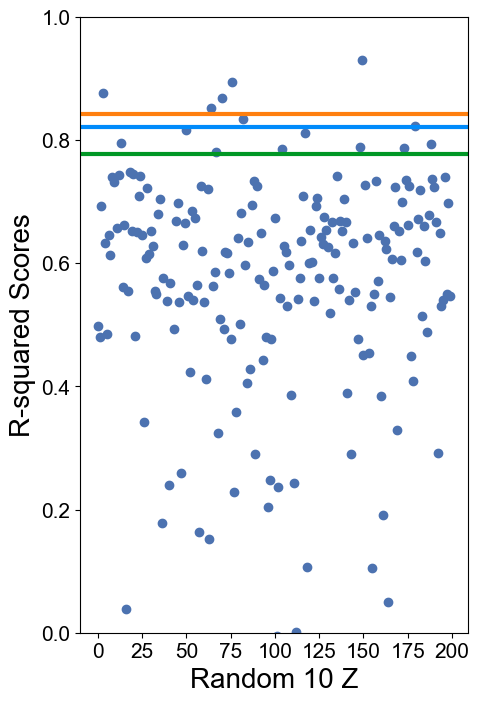

In [1756]:
import matplotlib.patches as mpatches
font = FontProperties(family='Arial', size=12)

# plt.figure(figsize=(5, 8), facecolor='white')

plt.figure(figsize=(5, 8))

# # 使用序号作为横坐标，r2_scores 作为纵坐标
plt.scatter(range(len(same_variables)), r2_scores,color=bluegreyse)

# 添加标签

plt.xlabel("Random 10 Z", fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel("R-squared Scores", fontdict={'size': 20, 'family': 'Arial'})
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15


y_allfe = r2_all ##全部特征，绿色
plt.axhline(y=y_allfe, color=greense, linewidth=3)

y_topfe=r2_preferred#顶部十个特征，蓝色
plt.axhline(y=y_topfe, color=bluese, linewidth=3)

y_bottomfe= r2_preferred_bot #底部十个特征，红色
plt.axhline(y=y_bottomfe, color=redse, linewidth=3)

y_some= r2_some #最优十个特征，棕色
plt.axhline(y=y_some, color=orangese, linewidth=3)

plt.ylim(0, 1.0)

# # 创建自定义图例
# legend_elements = [
#     mpatches.Patch(color=greense, label='All Z'),
#     mpatches.Patch(color=bluese, label='Top10 Z'),
#     mpatches.Patch(color=redse, label='Bottom10 Z'),
#     mpatches.Patch(color=orangese, label='Random10 Z')
# ]

# 添加自定义图例到图表
# plt.legend(handles=legend_elements,prop=font, facecolor='white', frameon=False,loc=(0.60,0.05))
plt.grid(False)
# 显示图表

plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [1757]:
# 输出所有的 R-squared 分数和 some 变量
for i in range(w):
    print(f"Iteration {i+1}: R-squared = {r2_scores[i]},mse= {mse_sames[i]} ,same = {same_variables[i]}")

Iteration 1: R-squared = 0.49738081575552273,mse= 25.294918130338306 ,same = 100,112,35,108,53,52,65,117,13,38
Iteration 2: R-squared = 0.4794336462420641,mse= 26.198131134825264 ,same = 92,64,46,1,65,107,0,52,66,9
Iteration 3: R-squared = 0.6929188582732684,mse= 15.454229728665277 ,same = 84,63,94,29,95,34,116,31,52,49
Iteration 4: R-squared = 0.87637568247525,mse= 6.221543245326012 ,same = 7,49,119,36,8,66,17,40,54,13
Iteration 5: R-squared = 0.6323968657642675,mse= 18.500072174773514 ,same = 102,20,7,35,87,66,40,90,111,47
Iteration 6: R-squared = 0.48563887289813146,mse= 25.885845601034198 ,same = 27,30,77,88,40,107,2,92,96,118
Iteration 7: R-squared = 0.6460544365800012,mse= 17.812738411016408 ,same = 40,78,89,103,53,63,74,29,51,45
Iteration 8: R-squared = 0.6136620914710806,mse= 19.442922342040553 ,same = 55,112,118,31,92,14,87,1,111,57
Iteration 9: R-squared = 0.7393474933838688,mse= 13.117652532967249 ,same = 93,54,32,113,97,37,14,62,42,39
Iteration 10: R-squared = 0.73248311782

normalized_mean #全部的shap值
top_k_values #前10个shap的值
meantop #前10个shap的特征

mse_all
rmse_all
r2_all

rmse_preferred
mse_preferred
r2_preferred

rmse_preferred_bot
mse_preferred_bot
r2_preferred_bot

rmse_some
mse_some
r2_some
r2_scores #随机特征的结果
select_battery = '第1节'

## 保存重要数据

In [1758]:

# 创建一个包含多个变量的字典
values_to_save = [ select_battery,MLmodel,r2_all,r2_preferred,r2_preferred_bot,r2_some,average_r2,meantop, normalized_mean, top_k_values,rmse_all,mse_all,  rmse_preferred, mse_preferred,rmse_preferred_bot,mse_preferred_bot,rmse_some,mse_some,r2_scores]
value_names = ["电池","模型","全部特征精度","顶部特征精度","底部特征精度","终选特征精度","随机特征平均精度","top10特征", "全部的shap值", "top10 shap值","rmse_all","mse_all","rmse_top", "mse_top", "rmse_bot","mse_bot","rmse_some终选","mse_some终选","r2_scores随机特征"]

file_name = f"被测电池_{select_battery}_模型{MLmodel}_全部数据.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")


## END